<a href="https://colab.research.google.com/github/anitha-2103/seaborn.py/blob/main/LOGISTIC_REGRESSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-1-e605401d04f7>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].median(),inplace=True)
<ipython-input-1-e605401d04f7>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

Accuracy: 0.7541899441340782
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.67      0.76       105
           1       0.65      0.88      0.75        74

    accuracy                           0.75       179
   macro avg       0.77      0.77      0.75       179
weighted avg       0.79      0.75      0.76       179

[[70 35]
 [ 9 65]]


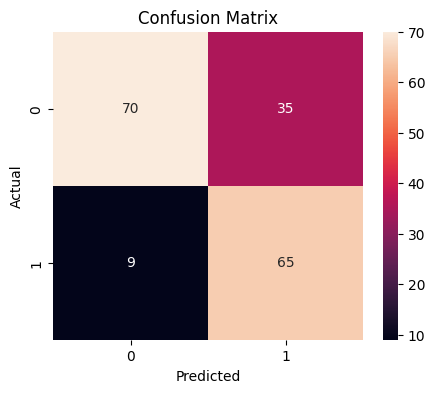

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

#Load the dataset
titanic=sns.load_dataset('titanic')

#Data Preprocessing
#Fill missing values
titanic['age'].fillna(titanic['age'].median(),inplace=True)
titanic['embark_town'].fillna(titanic['embark_town'].mode()[0],inplace=True)
titanic.drop(columns=['deck'],inplace=True)#Drop column with too many missing values

#Convert categorical features into numeric
titanic['sex']=titanic['sex'].map({'male':0,'female':1})
titanic['embark_town']=titanic['embark_town'].map({'Southampton':0,'Cherbourg':1,'Queenstown':2})

#Select features and target
features=['pclass','sex','age','sibsp','parch','fare','embark_town']
X=titanic[features]
Y=titanic['survived']

#Handle missing values again
X.fillna(X.median(),inplace=True)

#split  dataset into training and testing sets
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

#Standardize the data
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

#Train Logistic Regression model
model=LogisticRegression()
model.fit(X_train,Y_train)

#Make predictions
Y_pred=model.predict(X_test)

#Evaluate the model
accuracy=accuracy_score(Y_test,Y_pred)
print('Accuracy:',accuracy)
print('Classification Report:\n',classification_report(Y_test,Y_pred))

#Confusion Matrix
print(confusion_matrix(Y_test,Y_pred))
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(Y_test,Y_pred),annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
single_input = np.array([[3,0,25,0,7.25,0]])
single_input = scaler.transform(single_input)
output = model.predict(single_input)
print("Predicated Survival (0=No,1=Yes):",output[0])



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


ValueError: X has 6 features, but StandardScaler is expecting 7 features as input.

In [ ]:
single_input = np.array([[3, 0, 25, 0, 0, 7.25, 0]])  # Added missing features: sibsp, parch
single_input = scaler.transform(single_input)
output = model.predict(single_input)
print("Predicated Survival (0=No,1=Yes):", output[0])

Predicated Survival (0=No,1=Yes): 0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
single_input = np.array([[3, 5, 25, 0, 0, 7.25, 0]])  # Added missing features: sibsp, parch
single_input = scaler.transform(single_input)
output = model.predict(single_input)
print("Predicated Survival (0=No,1=Yes):", output[0])

Predicated Survival (0=No,1=Yes): 1


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
